# [**Visualisations avec des objets d'affichage**](https://nbviewer.org/github/Franck-PepperLabs/pepper_dsia_skl_doc_fr/blob/main/docs/examples/misc/plot_display_object_visualization.ipynb)<br/>([*Visualizations with Display Objects*](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html))

Dans cet exemple, nous allons construire des objets d'affichage, [**`ConfusionMatrixDisplay`**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay), [**`RocCurveDisplay`**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay) et [**`PrecisionRecallDisplay`**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.PrecisionRecallDisplay.html#sklearn.metrics.PrecisionRecallDisplay) directement à partir de leurs métriques respectives. Il s'agit d'une alternative à l'utilisation de leurs fonctions de tracé correspondantes lorsque les prédictions d'un modèle sont déjà calculées ou coûteuses à calculer. Notez qu'il s'agit d'une utilisation avancée et, en général, nous vous recommandons d'utiliser leurs fonctions de tracé respectives.

# Charger les données et former le modèle

Pour cet exemple, nous chargeons un ensemble de données de centre de services de transfusion sanguine à partir d'`OpenML <https://www.openml.org/d/1464>`. Il s'agit d'un problème de classification binaire où la cible est de savoir si un individu a donné du sang. Ensuite, les données sont divisées en un jeu de données d'entraînement et de test et une régression logistique est ajustée avec le jeu de données d'entraînement.

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = fetch_openml(data_id=1464, return_X_y=True, parser="pandas")
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=0))])

## Créer [**`ConfusionMatrixDisplay`**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay)

Avec le modèle ajusté, nous calculons les prédictions du modèle sur le jeu de données de test. Ces prédictions sont utilisées pour calculer la matrice de confusion qui est tracée avec le [**`ConfusionMatrixDisplay`**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay).

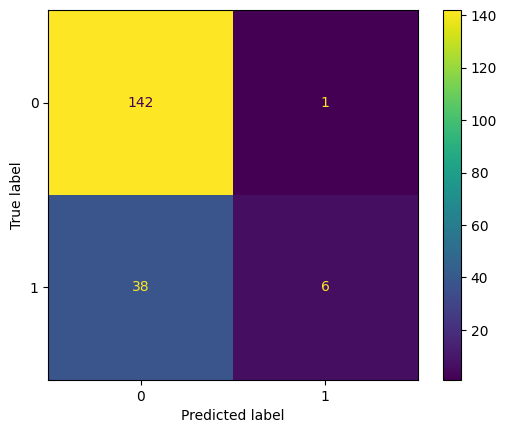

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

## Créer [**`RocCurveDisplay`**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay)

La courbe roc nécessite soit les probabilités, soit les valeurs de décision sans seuil de l'estimateur. Étant donné que la régression logistique fournit une fonction de décision, nous l'utiliserons pour tracer la courbe roc :

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


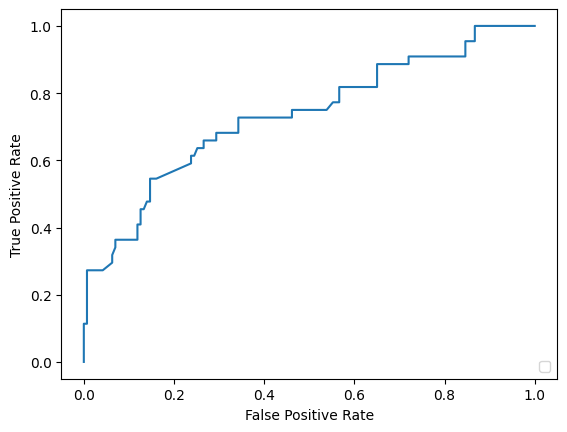

In [3]:
from sklearn.metrics import RocCurveDisplay, roc_curve

y_score = clf.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

## Créer [**`PrecisionRecallDisplay`**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.PrecisionRecallDisplay.html#sklearn.metrics.PrecisionRecallDisplay)

De même, la courbe de rappel de précision peut être tracée à l'aide de `y_score` à partir des sections de prévision.

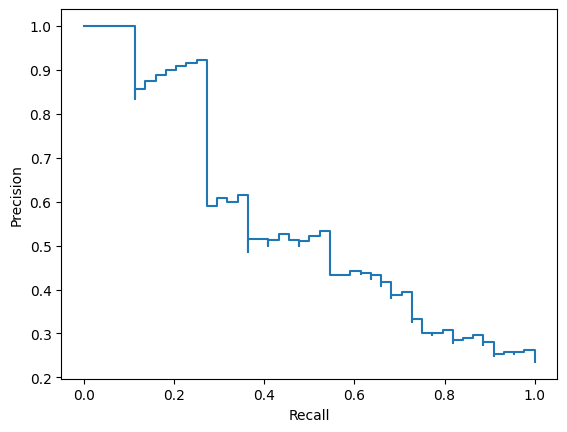

In [4]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

## Combinaison des objets d'affichage dans un seul tracé

Les objets d'affichage stockent les valeurs calculées qui ont été transmises en tant qu'arguments. Cela permet de combiner facilement les visualisations à l'aide de l'API de matplotlib. Dans l'exemple suivant, nous plaçons les affichages les uns à côté des autres dans une rangée.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


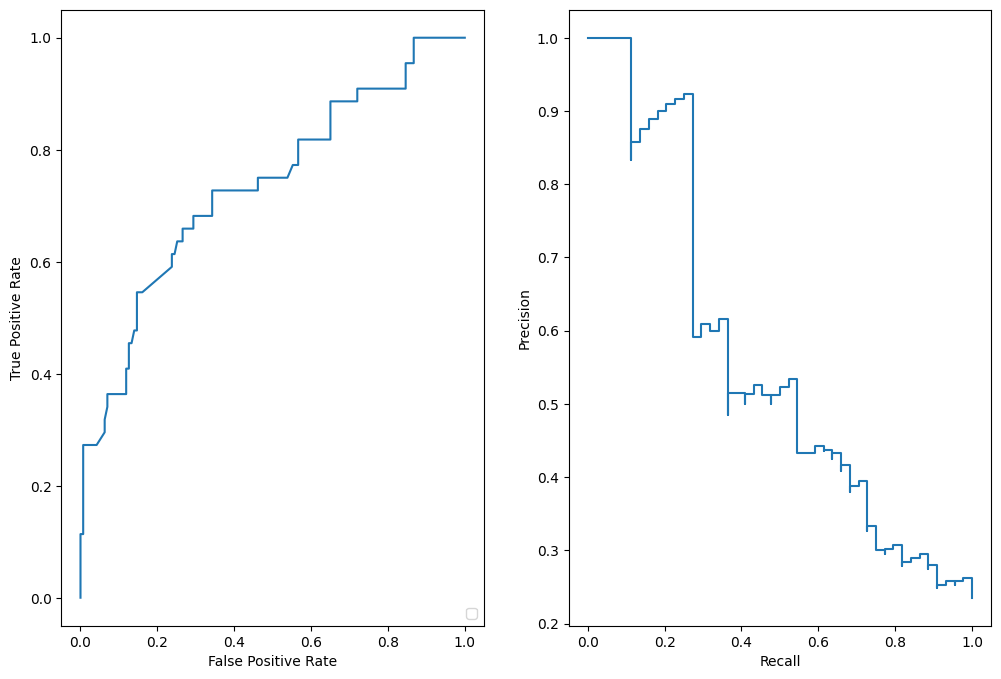

In [5]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()